<a href="https://colab.research.google.com/github/azmifasya/TugasPython_11/blob/main/TugasPython11_Azmi%20Fasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/dataset

/content/drive/.shortcut-targets-by-id/103/dataset


In [2]:
ls

GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/  GMB_11/
GMB_02/  GMB_04/  GMB_06/  GMB_08/  GMB_10/  nonGMB/


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
print("[INFO] loading images...")
imagePaths1 = paths.list_images("GMB_01")
imagePaths2 = paths.list_images("GMB_03")
imagePaths3 = paths.list_images("GMB_07")
imagePaths4 = paths.list_images("GMB_08")
imagePaths5 = paths.list_images("GMB_09")
data = []
labels = []

[INFO] loading images...


In [5]:
for imagePath in imagePaths1:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths2:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths3:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths4:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)
for imagePath in imagePaths5:
  image = Image.open(imagePath)
  image = np.array(image.resize((168, 168))) / 255.0 #normalisasi
  data.append(image)

  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [7]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [9]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(435, 168, 168, 3)
(146, 168, 168, 3)


In [10]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(168,168,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 166, 166, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 83, 83, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2560100   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [11]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [12]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 7s 524ms/step - loss: 1.7596 - accuracy: 0.2368 - val_loss: 1.5688 - val_accuracy: 0.2192
Epoch 2/30
14/14 [==============================] - 5s 389ms/step - loss: 1.4258 - accuracy: 0.3793 - val_loss: 1.3532 - val_accuracy: 0.3767
Epoch 3/30
14/14 [==============================] - 5s 381ms/step - loss: 1.0208 - accuracy: 0.7126 - val_loss: 0.9529 - val_accuracy: 0.7055
Epoch 4/30
14/14 [==============================] - 6s 400ms/step - loss: 0.6895 - accuracy: 0.7931 - val_loss: 0.8890 - val_accuracy: 0.6233
Epoch 5/30
14/14 [==============================] - 6s 402ms/step - loss: 0.4269 - accuracy: 0.8897 - val_loss: 0.7040 - val_accuracy: 0.7534
Epoch 6/30
14/14 [==============================] - 6s 409ms/step - loss: 0.3061 - accuracy: 0.8989 - val_loss: 0.6016 - val_accuracy: 0.7877
Epoch 7/30
14/14 [==============================] - 6s 396ms/step - loss: 0.1903 - accuracy: 0.9609 - val_loss: 0.5546 - val_accuracy: 0.7808
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


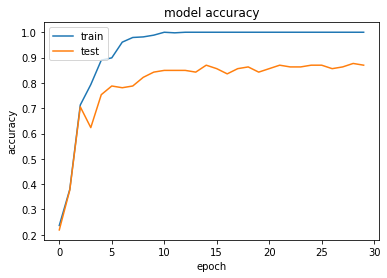

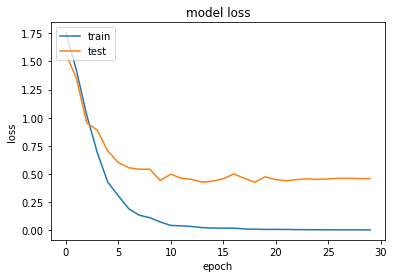

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.84      0.79      0.81        33
      GMB_03       0.81      0.92      0.86        24
      GMB_07       0.79      0.88      0.83        25
      GMB_08       0.97      0.88      0.92        32
      GMB_09       0.94      0.91      0.92        32

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146



In [15]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [16]:
ls

dataset@  daun.jpg  Untitled0.ipynb


In [17]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [18]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

<class 'numpy.ndarray'>


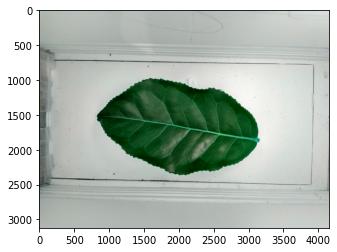

In [19]:
img_array = cv2.imread(image1)
print(type(img_array))
plt.imshow(img_array)
plt.show()

In [20]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((168, 168))) / 255.0
image_testing.shape

(168, 168, 3)

In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 168, 168, 3)


In [22]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9792010e-01 5.0771291e-06 1.6724028e-03 3.2546748e-08 4.0240903e-04]]
['GMB_01']
